# Статистика, DS-поток
## Задание SP.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Баллы за задание:**

* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  20 баллов
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  50 баллов
* Задача 5 &mdash;  50 баллов

**Важность задач:**

* *высокая:* задачи 2, 3, 5;
* *средне-высокая:* задача 4;
* *обычная* задача 1.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил код</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#f09000" size="3">Добавил интервалы</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [ ]:
# Bot check

# HW_ID: ds_sp2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

-----

## Задача 1. 


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** 

Из теоретического домашнего задания известно, что $X_{(n)}$ &mdash; смещенная оценка, а $\frac{n+1}{n}X_{(n)},  2\overline{X}$ &mdash; несмещенные.



Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на лекции.

**Решение:**

Воспользуемся кодом с лекции.

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Скопируй сюда замечание, которое оставил проверяющий.</i>

In [2]:
def max_biased(X):
    return X.max(axis=-1)

def max_unbiased(X):
    n = X.shape[1]
    return X.max(axis=-1) * (n+1)/n

def double_average(X):
    return 2 * X.mean(axis=-1)

estimators = [
    (max_biased, "$X_{(n)}$", "#FF6600", 0.0),
    (max_unbiased, "$\\frac{n + 1}{n}X_{(n)}$", "#00CC66", 0.1),
    (double_average, "$2\\overline{X}$", "#0066FF", 0.2)
]

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

In [3]:
def est_plot(distribution, estimators, sample_size, sample_count):
    '''
    Построение графика разброса реализаций оценок и их средних значений.
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''
    
    X = distribution.rvs(size=(sample_count, sample_size))
    plt.figure(figsize=(18, 0.7 * len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)
        plt.scatter(
            E, np.zeros(sample_count) + y, alpha=0.1, s=100, color=color, label=name
        )
        plt.scatter(
            E.mean(), y, marker='*', s=300, color='w', edgecolors='black'
        )
    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.6, 1.4))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Произведем вычисления для каждого размера выборки

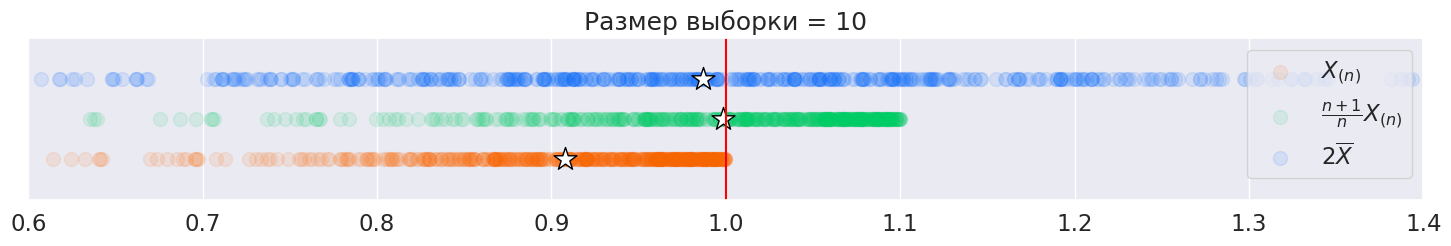

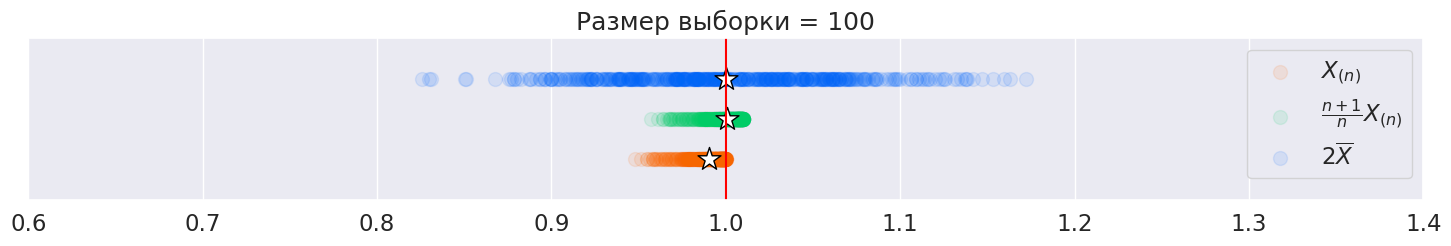

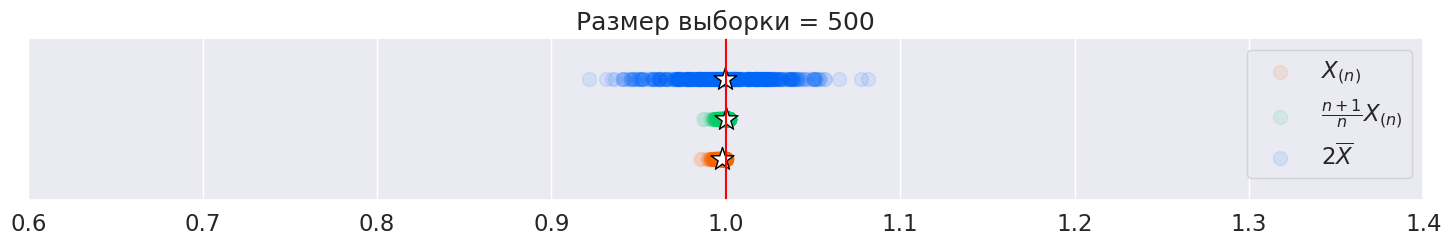

In [4]:
sample_size_list = (10, 100, 500)  # размеры выборок
sample_count = 500  # количество экспериментов

for sample_size in sample_size_list:
    est_plot(sps.uniform, estimators, sample_size, sample_count)

<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Скопируй сюда замечание, которое оставил проверяющий.</i>

**Вывод:** Несмещенность — свойство оценки в среднем быть равной параметру, который она оценивает.
Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному
значению параметра. Проведенные эксперименты подтверждают свойство несмещенности для оценок $2\overline{X}, \frac{n + 1}{n}X_{(n)}$ — среднее
значение этих оценок оказалось примерно равно истинному значению параметра в отличии от смещенной оценки $X_{(n)}$. <b><font color="#00b565" >Кроме того, можно заметить, что для смещенной оценки $X_{(n)}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является асимптотически несмещенной.</font></b>

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, причем $a$ не известно. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2 = \overline{X^2} - \overline{X}^2$ дисперсии $\sigma^2$. 

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

In [5]:
theta = 1  # истинное значение параметра
size = 300  # размер выборок
samples_count = 500  # количество выборок
n_range = (np.arange(size) + 1)  # размеры подвыборок

samples = sps.norm(scale=theta).rvs(size=(samples_count, size))
samples_squared_mean = (samples ** 2).cumsum(axis=1) / n_range
estimation = samples_squared_mean - (samples.cumsum(axis=1) / n_range)**2

Визуализируем для каждой выборки все оценки в зависимости от размера выборки. Что же мы видим?
1. С ростом размера выборки траектории оценок сходятся к истинному значению параметра, об этом
говорит свойство состоятельности.
2. Свойство асимптотической нормальности говорит о том, что с вероятностью около 0.95 при
больших размерах выборки значение оценки отклоняется от истинного значения параметра не
более чем на $\frac{2\sqrt{2}\sigma^2}{\sqrt{n}}$ также можно увидеть на графике. Это следует из свойств нормального распределения, т.к. асимптотическая дисперсия оценки $S^2$ есть $2\sigma^4$ (считали в теоретическом дз).

<b><font color="#f09000" size="5">Добавил интервалы</font></b>

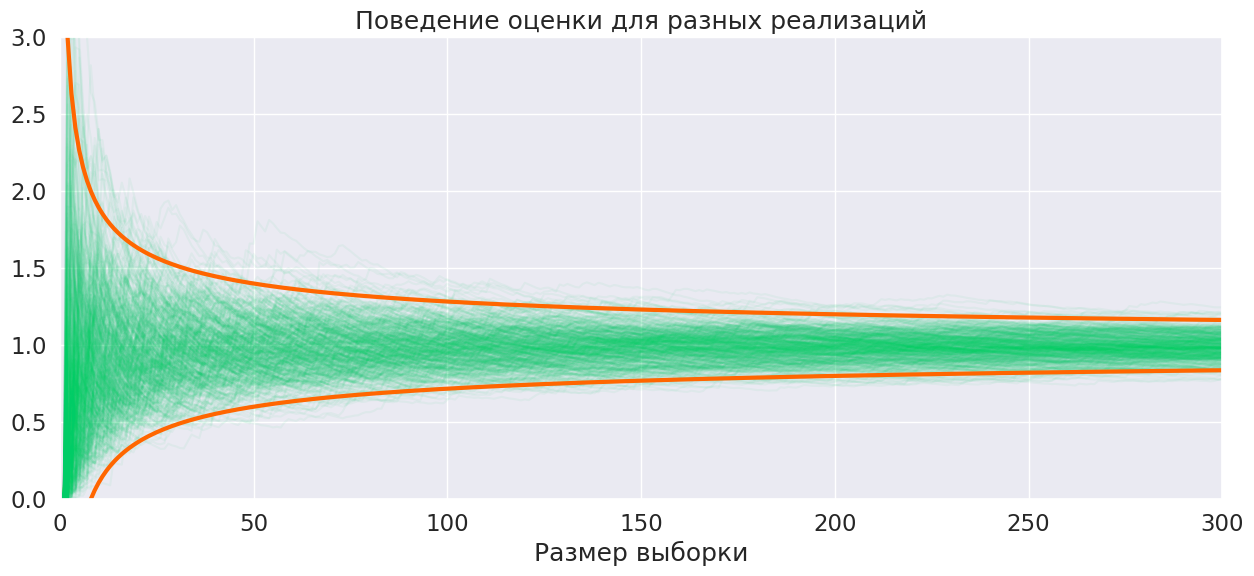

In [6]:
plt.figure(figsize=(15, 6))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, estimation[i], color='#00CC66', alpha=0.05)
plt.plot(n_range, theta + 2 * np.sqrt(2)/np.sqrt(n_range), color='#FF6600', lw=3)
plt.plot(n_range, theta - 2 * np.sqrt(2)/np.sqrt(n_range), color='#FF6600', lw=3)
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 3))
plt.xlim((0, size));

<b><font color="#f09000" size="5">===== Конец правок =====</font></b>

Посмотрим также, как себя ведут величины
$$
Z_n = \sqrt{n}\frac{\widehat{\theta} - \theta}{\sqrt{2}\sigma^2}
$$
распределение которых должно сходиться к стандартному нормальному.
На графике ниже видим, что при больших размерах выборки распределение похоже на стандратное
нормальное.

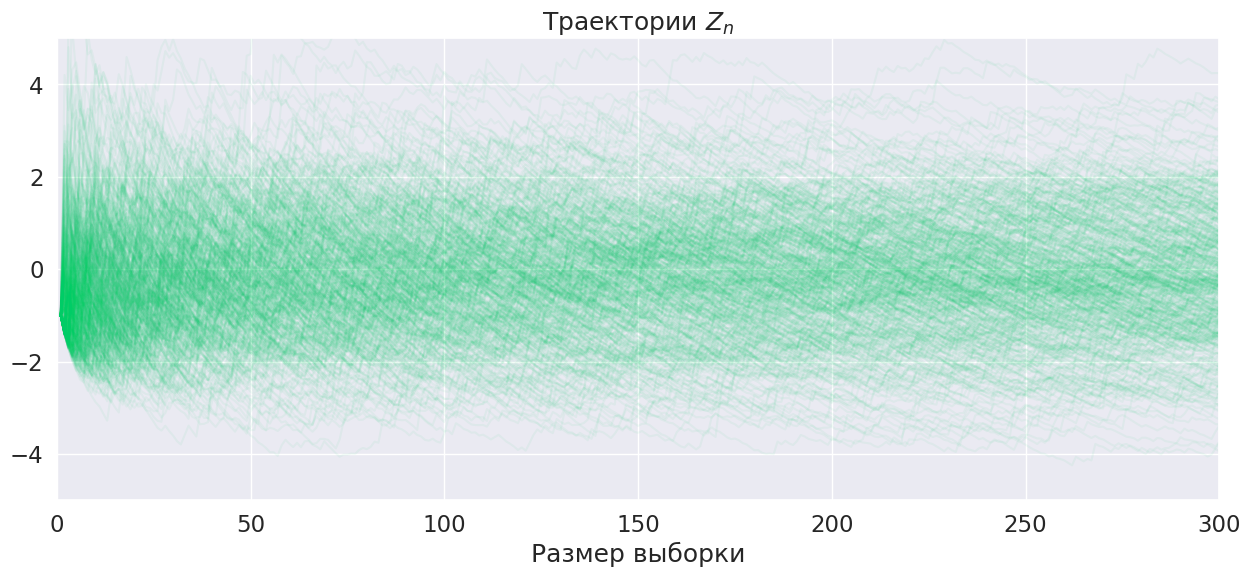

In [7]:
Zn = (estimation - theta) * np.sqrt(n_range) / theta

plt.figure(figsize=(15, 6))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Zn[i], color='#00CC66', alpha=0.05)
plt.title('Траектории $Z_n$')
plt.xlabel('Размер выборки')
plt.ylim((-5, 5))
plt.xlim((0, size));

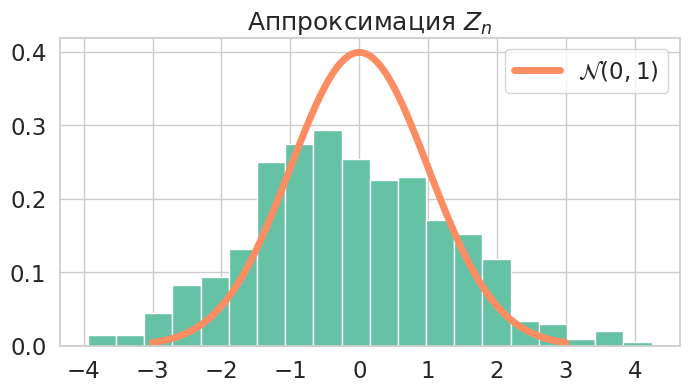

In [8]:
sns.set_style('whitegrid')
grid = np.linspace(-3, 3, 100)

plt.figure(figsize=(8, 4))
plt.hist(Zn[:, -1], bins=20, density=True)
plt.plot(grid, sps.norm.pdf(grid), lw=5, label="$\\mathcal{N}(0, 1)$")
plt.legend()
plt.title('Аппроксимация $Z_n$');

<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Скопируй сюда замечание, которое оставил проверяющий.</i>

**Вывод:** 
* Визуализация подтверждает теоретические свойства оценки $S^2$;
* <b><font color="#00b565">На первом графике виден смысл состоятельности: при больших оценка стремится к истинному значению; </font></b>
* В отличии от свойства состоятельности, свойство асмптотической нормальности устанавливает численную характеристику степени отклонения оценки от истинного значения параметра — при достаточно большом размере выборки отклонения не превосходят величины $\frac{2\sqrt{2}\sigma^2}{\sqrt{n}}$с вероятностью, близкой к 1.

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>